# Versuch 253: Absorption von $\alpha$-, $\beta$- & $\gamma$-Strahlung

## Auswertung der Messergebnisse

In [1]:
#Benötigte Pakete
import numpy as np
from scipy.optimize import curve_fit
import scipy.integrate as integrate
from scipy.stats import chi2
import matplotlib.pyplot as plt
%matplotlib inline 

#Plot settings
plt.style.use('classic')
plt.rcParams["font.family"]='serif'
plt.rcParams["figure.figsize"][0] = 10
plt.rcParams["figure.figsize"][1] = 7
plt.rcParams['errorbar.capsize']=2

### Teil 1: Messung des Nulleffekts

In [2]:
#Betriebsspannung
U1=520 #V
U1_err=5 #V

#Zerfälle in 5 Minuten = 300s
n0=140
n0_err=np.sqrt(140)

#Normierung auf Zerfälle/Sekunde
n0_s=140/300
n0_s_err=n0_err/300

### Teil 2: Absorption von $\beta$-Strahlung in Aluminium

In [3]:
#Kennnummer des Präparats: GS 527

#Anzahl Zerfälle
n_beta=np.array([1574,967,678,443,315,181,125,307,166,122,75,67,359])
n_beta_err=np.sqrt(n_beta)

#Torzeit
T=np.array([30,30,30,30,30,30,30,120,120,120,120,120,300])

#Absorberdicke in mm
x1=np.array([0,0.3,0.6,0.9,1.2,1.5,1.8,2.1,2.4,2.7,3.0,3.3,4.3])

#aus letztem Messwert wird n0_beta bestimmt, n0_beta in Zerfälle/s
n0_beta=n_beta[12]/300
n0_beta_err=n_beta_err[12]/300

#Abzug der Nullmessung unter Berücksichtigung der jeweiligen Torzeit, angegeben in Zerfälle/s
n_beta_korr=n_beta/T-n0_beta
n_beta_korr_err=np.sqrt((n_beta_err/T)**2+n0_beta_err**2)

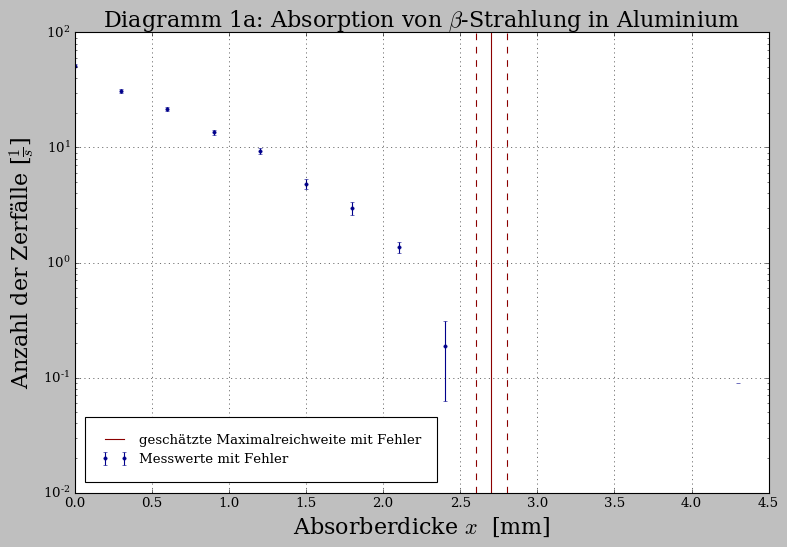

In [4]:
#Plot der Messdaten
plt.errorbar(x1,n_beta_korr, yerr=n_beta_korr_err,linewidth=1,linestyle='',marker='.',color='darkblue',label='Messwerte mit Fehler')
plt.plot(2*[2.7],[1e-2,1e2],color='darkred',label='geschätzte Maximalreichweite mit Fehler')
plt.plot(2*[2.6],[1e-2,1e2],color='darkred',linestyle='--')
plt.plot(2*[2.8],[1e-2,1e2],color='darkred',linestyle='--')
plt.xlabel(r'Absorberdicke $ x$  [mm]', size=20)
plt.ylabel(r'Anzahl der Zerfälle [$\frac{1}{s}$]', size=20)
plt.yscale('log')
plt.legend(frameon=True,fontsize='medium',loc='best', borderpad=1.2, borderaxespad=0.8)
plt.title(r'Diagramm 1a: Absorption von $\beta$-Strahlung in Aluminium', size=20)
plt.grid(ls='dotted')

#Abspeichern des Bildes im Format "PDF"
plt.tight_layout()
plt.savefig('Diagramme/V253Diagramm1a.pdf', format='PDF')

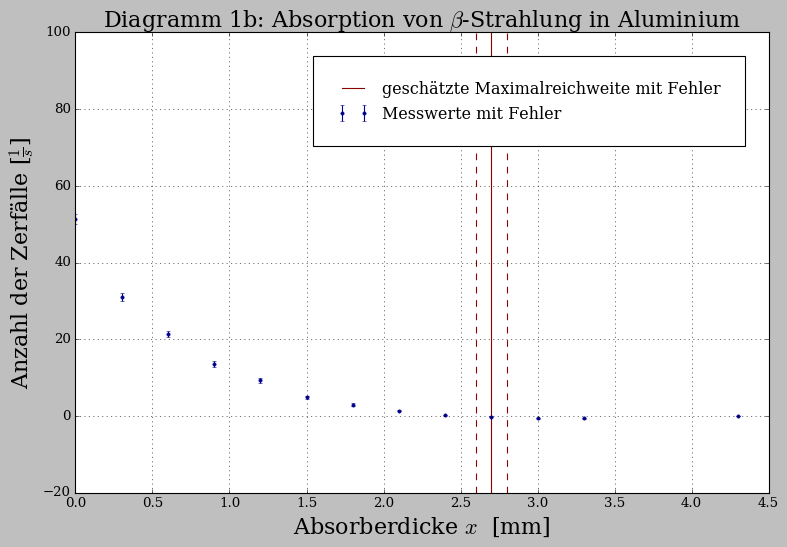

In [5]:
#Plot der Messdaten nochmal nicht logarithmisch, da einige Messwerte eigentlich nur Untergrund waren
    #und deshalb jetzt teilweise negativ sind
plt.errorbar(x1,n_beta_korr, yerr=n_beta_korr_err,linewidth=1,linestyle='',marker='.',color='darkblue',label='Messwerte mit Fehler')
plt.plot(2*[2.7],[-20,1e2],color='darkred',label='geschätzte Maximalreichweite mit Fehler')
plt.plot(2*[2.6],[-20,1e2],color='darkred',linestyle='--')
plt.plot(2*[2.8],[-20,1e2],color='darkred',linestyle='--')
plt.xlabel(r'Absorberdicke $ x$  [mm]', size=20)
plt.ylabel(r'Anzahl der Zerfälle [$\frac{1}{s}$]', size=20)
plt.legend(frameon=True,fontsize='large',loc='best', borderpad=1.5, borderaxespad=1.5)
plt.title(r'Diagramm 1b: Absorption von $\beta$-Strahlung in Aluminium', size=20)
plt.grid(ls='dotted')

#Abspeichern des Bildes im Format "PDF"
plt.tight_layout()
plt.savefig('Diagramme/V253Diagramm1b.pdf', format='PDF')

In [6]:
#Maximalreichweite x_max aus Plots
x_max=2.7e-1 #cm
x_max_err=0.1e-1

rho_alu=2.6989 #g/cm^3
R_beta_ES=0.130 #g/cm^2

#Flächendichte R_beta ergibt sich aus R_beta=rho_alu*x_max+R_beta_ES
R_beta=rho_alu*x_max+R_beta_ES
R_beta_err=rho_alu*x_max_err

print('Die Flächendichte R_beta berechnet sich zu:')
print('R_beta = (',R_beta,' +/- ',R_beta_err,') g/cm^2')

#Mit Diagramm 8 entspricht dies einer Energie von (1.8+/-0.2)MeV (Fehler aus Diagramm abgeschätzt)
E_max=1.8 #MeV
E_max_err=0.2
print('Dies entspricht einer Maximalenergie von E_max = (',E_max,'+/-',E_max_err,') MeV')
print()

#Vergleich mit Literaturwert (aus Skript) liefert:
E_max_lit=2.274 #MeV

diff=np.abs(E_max-E_max_lit)
diff_err=E_max_err

print('Der Vergleich mit dem Literaturwert ('+str(E_max_lit)+' MeV) liefert:')
print('∆E_max =(' + str(diff) + ' +/- ' + str(diff_err)+ ') MeV')
print('Damit folgt Sigma =',round(diff/diff_err,2))

Die Flächendichte R_beta berechnet sich zu:
R_beta = ( 0.8587030000000001  +/-  0.026989000000000003 ) g/cm^2
Dies entspricht einer Maximalenergie von E_max = ( 1.8 +/- 0.2 ) MeV

Der Vergleich mit dem Literaturwert (2.274 MeV) liefert:
∆E_max =(0.474 +/- 0.2) MeV
Damit folgt Sigma = 2.37


### Teil 3: Absorption von $\gamma$-Strahlung in Blei

In [7]:
#Kennnummer des Präparats: A AE 8603

#Anzahl Zerfälle
n_gamma=np.array([3950,2623,2052,1566,1094,861,621,513,377,306,225])
n_gamma_err=np.sqrt(n_gamma)

#Torzeit immer 60s

#Absorberdicke in mm
x2=10*np.array([0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0])

#Abzug der Nullmessung unter Berücksichtigung der jeweiligen Torzeit
n_gamma_korr=1/60*(n_gamma-(n0_s*60)*np.ones(11))  #in Zerfälle/s
n_gamma_korr_err=1/60*np.sqrt(n_gamma_err**2+(60*n0_s_err*np.ones(11))**2)

In [8]:
#linearer Fit
def exp_fit(x,a,b):
    return a*np.exp(-b*x)
popt,pcov=curve_fit(exp_fit,x2,n_gamma_korr,sigma=n_gamma_korr_err,p0=[62,0.05])

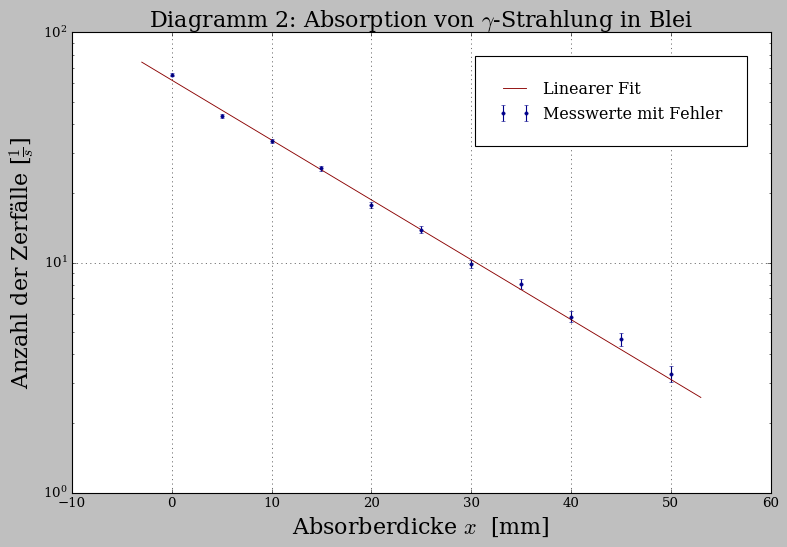

In [9]:
#Plot der Messdaten
plt.errorbar(x2,n_gamma_korr, yerr=n_gamma_korr_err,linewidth=1,linestyle='',marker='.',color='darkblue',label='Messwerte mit Fehler')
plt.plot(np.linspace(-3,53,2),exp_fit(np.linspace(-3,53,2),*popt),color='darkred',label='Linearer Fit', linewidth=0.8)
plt.xlabel(r'Absorberdicke $ x$  [mm]', size=20)
plt.ylabel(r'Anzahl der Zerfälle [$\frac{1}{s}$]', size=20)
plt.yscale('log')
plt.legend(frameon=True,fontsize='large',loc='best', borderpad=1.5, borderaxespad=1.5)
plt.title(r'Diagramm 2: Absorption von $\gamma$-Strahlung in Blei', size=20)
plt.grid(ls='dotted')

#Abspeichern des Bildes im Format "PDF"
plt.tight_layout()
plt.savefig('Diagramme/V253Diagramm2.pdf', format='PDF')

In [10]:
#Güte des Fits
chi_squared2=np.sum((exp_fit(x2,*popt)-n_gamma_korr)**2/n_gamma_korr_err**2)

#Freiheitsgrade
dof2=len(n_gamma_korr)-2

chi_squared2_red=chi_squared2/dof2

print('Wir erhalten die nachfolgenden Werte für die Güte des Fits:')
print('chi_squared= ' + str(chi_squared2))
print('chi_squared_red= ' + str(chi_squared2_red))
print()

#Fitwahrscheinlichkeit
prob2=round(1-chi2.cdf(chi_squared2,dof2),2)*100

print('Die Fitwahrscheinlichkeit beträgt: ' + str(prob2) + ' %')

Wir erhalten die nachfolgenden Werte für die Güte des Fits:
chi_squared= 29.2765461243
chi_squared_red= 3.25294956937

Die Fitwahrscheinlichkeit beträgt: 0.0 %


In [11]:
#Schwächungskoeffizient aus Geradensteigung
mu=10*popt[1]  #1/cm
mu_err=10*(pcov[1,1])**0.5
print('Aus dem linearen Fit folgt für den Schwächungskoeffizienten:')
print('mu = (' + str(mu) + ' +/- ' + str(mu_err) + ') 1/cm' )

#Massenschwächungskoeffizient
rho_pb=11.342 #g/cm^3

mu_rho=mu/rho_pb  #cm^2/g
mu_rho_err=mu_rho*(mu_err/mu)

print()
print('Für den materialunabhängigen Massenschwächungskoeffizienten mu/rho folgt:')
print('mu/rho = (' + str(mu_rho) + ' +/- ' + str(mu_rho_err) + ') cm^2/g')

Aus dem linearen Fit folgt für den Schwächungskoeffizienten:
mu = (0.598944335731 +/- 0.0128840856391) 1/cm

Für den materialunabhängigen Massenschwächungskoeffizienten mu/rho folgt:
mu/rho = (0.0528076473048 +/- 0.00113596240866) cm^2/g


Ablesen der zugehörigen Energie aus Diagramm 9 in der Anleitung liefert:
$E_\gamma= 1.4 \pm 0.1 \ MeV$ 

Die beiden möglichen Übergänge haben nach Skript die beiden Energien $E_1= 1.173\ MeV$ und $E_2= 1.333\ MeV$.

Der gemessene Wert ist im 3$\sigma$- bzw. 1$\sigma$-Intervall mit den Literaturwerten vereinbar.

### Teil 4: Aktivität des vorliegenden $\gamma$-Strahlers

In [12]:
#Abstand Präparat und Zählrohr
d=np.array([0.05,0.10,0.20]) #m
d_err=3e-3*np.ones(3)

#registrierte Zerfälle, direkt in Zerfälle/s
N=1/60*np.array([39504,11939,3164])
N_err=1/60*np.sqrt(60*N)

#Radius des Zählrohrs
r=7e-3 #m

#Raumwinkel
Omega=np.pi*r**2/d**2
Omega_err=Omega*2*d_err/d

#Ansprechwahrscheinlichkeit Zählrohr für gamma-Strahlung
epsilon= 0.04 
epsilon_err=epsilon*0.03

#Aktivität für gesamte Kugelfläche
A=0.5*4*N/epsilon*d**2/r**2 #Faktor 0.5, da 2 gamma-Quanten pro Zerfall
A_err=A*np.sqrt((N_err/N)**2+(d_err/d)**2+(epsilon_err/epsilon)**2)

print('Für die Aktivität A des Gamma-Strahlers folgt:')
print('A = ' + str(A*1e-3)+' kBq') 
print('+/- '  + str(A_err*1e-3)+' kBq') 

Für die Aktivität A des Gamma-Strahlers folgt:
A = [ 1679.59183673  2030.44217687  2152.38095238] kBq
+/- [ 112.98690428   88.12584794   81.7070466 ] kBq


In [13]:
#Herstellerangabe: 3700kBq am 2.2.2015
A0=3700e3 #Bq
#Versuchsdatum: 5.3.2018; Differenz:365+366+365+28+3=1127 Tage = 3.086 Jahre
del_t=3.086 #Jahre
#Halbwertszeit nach Skript T12=5.27 Jahre
T12=5.27 #Jahre

#Aktivität am Versuchstag
A_lit=A0*np.exp(-np.log(2)*del_t/T12)

print('Für die Aktivität A_lit des Gamma-Strahlers am Versuchstag folgt:')
print('A_lit = ' + str(A_lit*1e-3)+' kBq')

Für die Aktivität A_lit des Gamma-Strahlers am Versuchstag folgt:
A_lit = 2465.61325548 kBq


In [14]:
#Vergleich der Messwerte mit Literaturwert
diff_A=np.abs(A-A_lit)
diff_A_err=A_err

print('Der Vergleich mit dem Literaturwert liefert:')
print('diff = ' + str(diff_A*1e-3)+' kBq') 
print('   +/- '  + str(diff_A_err*1e-3)+' kBq') 
print('Damit folgt Sigma =',(diff_A/diff_A_err).round(2))

Der Vergleich mit dem Literaturwert liefert:
diff = [ 786.02141874  435.17107861  313.2323031 ] kBq
   +/- [ 112.98690428   88.12584794   81.7070466 ] kBq
Damit folgt Sigma = [ 6.96  4.94  3.83]


#### 4.1: Raumwinkel-Korrektur

In [15]:
#Länge l des Zählrohrs: l=4cm
l=4e-2 #m

#Korrekturfaktor k1=(1+0.5*l/d)**2
k1=(1+0.5*l/d)**2
k1_err=2*(1+0.5*l/d)*0.5*l/d**2*d_err

print('Der Korrekturfaktor k1 ergibt sich zu:')
print('k1 = ' + str(k1))
print(' +/- '  + str(k1_err)) 
print()

#korrigierte Aktivität A_korr=A*k1
A_korr=A*k1
A_korr_err=A_korr*np.sqrt((A_err/A)**2+(k1_err/k1)**2)

print('Die korrigierte Aktivität A_korr ergibt sich zu:')
print('A_korr = ' + str(A_korr*1e-3)+' kBq')
print('     +/- '  + str(A_korr_err*1e-3)+' kBq')

Der Korrekturfaktor k1 ergibt sich zu:
k1 = [ 1.96  1.44  1.21]
 +/- [ 0.0672  0.0144  0.0033]

Die korrigierte Aktivität A_korr ergibt sich zu:
A_korr = [ 3292.          2923.83673469  2604.38095238] kBq
     +/- [ 248.55851575  130.22596525   99.12034548] kBq


In [16]:
#Vergleich der Messwerte mit Literaturwert
diff_A_korr=np.abs(A_korr-A_lit)
diff_A_korr_err=A_korr_err

print('Der Vergleich mit dem Literaturwert liefert:')
print('diff = ' + str(diff_A_korr*1e-3)+' kBq') 
print('   +/- '  + str(diff_A_korr_err*1e-3)+' kBq') 
print('Damit folgt Sigma =',(diff_A_korr/diff_A_korr_err).round(2))

Der Vergleich mit dem Literaturwert liefert:
diff = [ 826.38674452  458.22347922  138.7676969 ] kBq
   +/- [ 248.55851575  130.22596525   99.12034548] kBq
Damit folgt Sigma = [ 3.32  3.52  1.4 ]


#### 4.2: Absorptions-Korrektur

In [17]:
#Präparatkapseldaten
d=0.14 #cm
rho_kapsel=7.9 #g/cm^3
#mu_rho aus vorherigem Aufgabenteil
mu_kapsel=mu_rho*rho_kapsel #1/cm
mu_kapsel_err=mu_kapsel*mu_rho_err/mu_rho

#Korrekturfaktor k2=exp(-mu*x)
k2=np.exp(-mu_kapsel*d)
k2_err=k2*d*mu_kapsel_err

print('Der Korrekturfaktor k2 ergibt sich zu:')
print('k2 = ' + str(k2)+' +/- '  + str(k2_err))
print()

#korrigierte Aktivität A_korr2=A_korr*k2
A_korr2=A_korr*k2
A_korr2_err=A_korr2*np.sqrt((A_korr_err/A_korr)**2+(k2_err/k2)**2)

print('Die korrigierte Aktivität A_korr2 ergibt sich zu:')
print('A_korr2 = ' + str(A_korr2*1e-3)+' kBq')
print('      +/- ' + str(A_korr2_err*1e-3)+' kBq') 

Der Korrekturfaktor k2 ergibt sich zu:
k2 = 0.943267603302 +/- 0.00118509729176

Die korrigierte Aktivität A_korr2 ergibt sich zu:
A_korr2 = [ 3105.23695007  2757.96046918  2456.62817904] kBq
      +/- [ 234.4896521   122.88679547   93.54794041] kBq


In [18]:
#Vergleich der Messwerte mit Literaturwert
diff_A_korr2=np.abs(A_korr2-A_lit)
diff_A_korr2_err=A_korr2_err

print('Der Vergleich mit dem Literaturwert liefert:')
print('diff = ' + str(diff_A_korr2*1e-3)+' kBq') 
print('   +/- '  + str(diff_A_korr2_err*1e-3)+' kBq') 
print('Damit folgt Sigma =',(diff_A_korr2/diff_A_korr2_err).round(2))

Der Vergleich mit dem Literaturwert liefert:
diff = [ 639.62369459  292.3472137     8.98507644] kBq
   +/- [ 234.4896521   122.88679547   93.54794041] kBq
Damit folgt Sigma = [ 2.73  2.38  0.1 ]


### Teil 5: Absorptionsmessung und Energiebestimmung von $\alpha$-Strahlung

In [19]:
#Anzahl Zerfälle
n_alpha=np.array([13387,13206,12998,12743,12029,9735,6682,3737,1094,423,253,222,243,246,241])
n_alpha_err=np.sqrt(n_alpha)

#Torzeit immer 60s

#Druck in mbar
p=np.array([22,123,220,319,353,390,420,448,488,517,567,619,717,818,916])

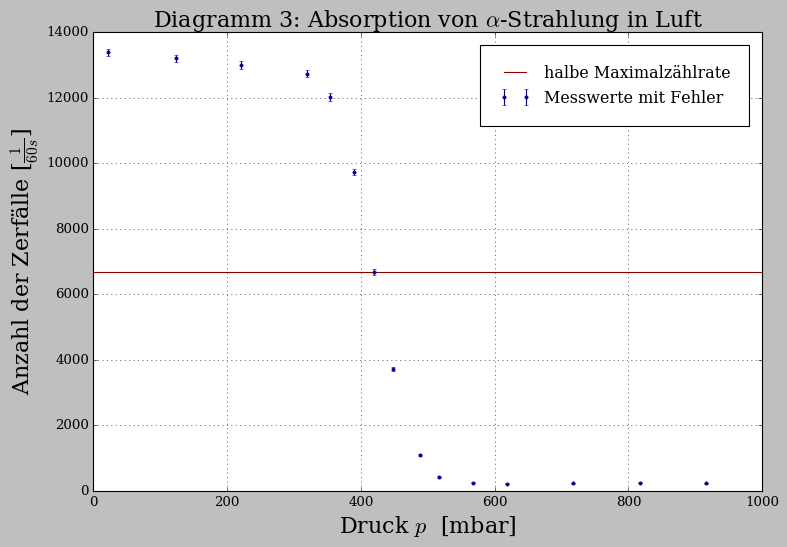

In [20]:
#Plot der Messdaten
plt.errorbar(p,n_alpha, yerr=n_alpha_err,linewidth=1,linestyle='',marker='.',color='darkblue',label='Messwerte mit Fehler')
plt.xlabel(r'Druck $ p$  [mbar]', size=20)
plt.ylabel(r'Anzahl der Zerfälle [$\frac{1}{60s}$]', size=20)
plt.plot([0,1e3],2*[0.5*n_alpha[0]],color='darkred',label='halbe Maximalzählrate')
#plt.yscale('log')
plt.legend(frameon=True,fontsize='large',loc='best', borderpad=1.2, borderaxespad=0.8)
plt.title(r'Diagramm 3: Absorption von $\alpha$-Strahlung in Luft', size=20)
plt.grid(ls='dotted')

#Abspeichern des Bildes im Format "PDF"
plt.tight_layout()
plt.savefig('Diagramme/V253Diagramm3.pdf', format='PDF')

In [21]:
#Druck p1, bei dem die Zählrate auf die Hälfte abgefallen ist
p1=420 #mbar
p1_err=10
#Normaldruck
p0=1013 #mbar
#Abstand Präparat - Zählrohr
s0=4.20 #cm
s0_err=0.05

#Reichweite bei p1
s1=p1/p0*s0
s1_err=s1*np.sqrt((p1_err/p1)**2+(s0_err/s0)**2)

In [22]:
#Korrekturen
#Flächendichte Glimmerfenster
rho_Gl=2.25 #mg/cm^2
s2=rho_Gl/1.43 #cm

#Schutzschicht aus Gold
s3=0.68 #cm

s_ges=s1+s2+s3
s_ges_err=s1_err

print('Die Gesamtreichweite ergibt sich zu:')
print('s_ges = (' + str(s_ges)+' +/- '  + str(s_ges_err)+') cm')

Die Gesamtreichweite ergibt sich zu:
s_ges = (3.994788863653622 +/- 0.0463548149334) cm


In [23]:
#Aus Diagramm 8 ergibt sich eine Energie von E_alpha= 5.6 +/- 0.2 MeV
E_alpha=5.6 #MeV
E_alpha_err=0.2

#Vergleich mit Literaturwert (aus Skript) liefert:
E_alpha_lit=5.48 #MeV

diff2=np.abs(E_alpha-E_alpha_lit)
diff2_err=E_alpha_err

print('Der Vergleich mit dem Literaturwert ('+str(E_alpha_lit)+' MeV) liefert:')
print('∆E_alpha =(' + str(diff2) + ' +/- ' + str(diff2_err)+ ') MeV')
print('Damit folgt Sigma =',round(diff2/diff2_err,2))

Der Vergleich mit dem Literaturwert (5.48 MeV) liefert:
∆E_alpha =(0.12 +/- 0.2) MeV
Damit folgt Sigma = 0.6
